## Lincoln 4H Analysis - Chart Review week 4 

In [2]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Add the path to the dataset
df = pd.read_csv("../data/Codeyou_4h_dataset.csv", header=1)

Looking at the data to verify its read in correctly 

In [4]:
# Display the first few rows of the dataset and its information
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   StudentID       15 non-null     int64  
 1   Name            15 non-null     object 
 2   Age             15 non-null     int64  
 3   Clubs           15 non-null     object 
 4   Hours_Per_Week  15 non-null     float64
 5   County          15 non-null     object 
 6   School          15 non-null     object 
 7   years_in_4h     15 non-null     int64  
 8   zipcode         15 non-null     int64  
 9   parent_contact  0 non-null      float64
 10  Tshirt_size     0 non-null      float64
dtypes: float64(3), int64(4), object(4)
memory usage: 1.4+ KB


,StudentID,Age,Hours_Per_Week,years_in_4h,zipcode,parent_contact,Tshirt_size
count,15.000000,15.000000,15.000000,15.000000,15.000000,0.0,0.0
mean,2118.000000,12.133333,2.933333,2.400000,40467.066667,NaN,NaN
std,4.472136,4.356713,1.590897,1.549193,30.433691,NaN,NaN
min,2111.000000,5.000000,1.000000,1.000000,40419.000000,NaN,NaN
25%,2114.500000,8.500000,2.000000,1.000000,40437.000000,NaN,NaN
50%,2118.000000,14.000000,2.500000,2.000000,40484.000000,NaN,NaN
75%,2121.500000,15.000000,3.750000,3.000000,40489.000000,NaN,NaN
max,2125.000000,18.000000,6.500000,5.000000,40489.000000,NaN,NaN


In [5]:
# Drop columns with more than 100% missing values
#df = df.drop(columns=['parent_contact', 'Tshirt_size'])

In [6]:
# check for missing values
print(df.isnull().sum())

StudentID          0
Name               0
Age                0
Clubs              0
Hours_Per_Week     0
County             0
School             0
years_in_4h        0
zipcode            0
parent_contact    15
Tshirt_size       15
dtype: int64


In [7]:
# New df with only the columns needed
clean_df = df[['StudentID', 'Name', 'Age', 'Clubs', 'Hours_Per_Week', 'County', 'School', 'years_in_4h', 'zipcode']]

# Save cleaned version to CSV without the index column
clean_df.to_csv('clean_lincoln_4h.csv', index=False)

I want to group by club and see the hours that are spent in each. First I have to split them into a list and use .explode() to give each club its own row.

In [8]:
# Turn the comma-separated string into a list
df['Clubs'] = df['Clubs'].str.split(',')

# Explode the list into separate rows (one row per club)
df = df.explode('Clubs')

# Clean up extra spaces
df['Clubs'] = df['Clubs'].str.strip()

print(df.head(5))

   StudentID    Name  Age                    Clubs  Hours_Per_Week   County  \
0       2114   Aiden    6               Cloverbuds             1.0  Lincoln   
1       2121   Avery   14  Outdoors Adventure Club             2.5  Lincoln   
2       2116   Caleb   14  Outdoors Adventure Club             4.0  Lincoln   
2       2116   Caleb   14       Lincoln Leadership             4.0  Lincoln   
3       2122  Elijah   15       Lincoln Leadership             3.5  Lincoln   

                 School  years_in_4h  zipcode  parent_contact  Tshirt_size  
0  Highland Elememtery             1    40489             NaN          NaN  
1    Lincoln Highschool            2    40419             NaN          NaN  
2    Lincoln Highschool            3    40484             NaN          NaN  
2    Lincoln Highschool            3    40484             NaN          NaN  
3    Lincoln Highschool            3    40484             NaN          NaN  


In [9]:
# Count the number of students in each club and sort by count
club_counts = df.groupby('Clubs')['StudentID'].count().reset_index()
club_counts = club_counts.sort_values(by='StudentID', ascending=False)

#1. Which 4H clubs have the highest student participation? 

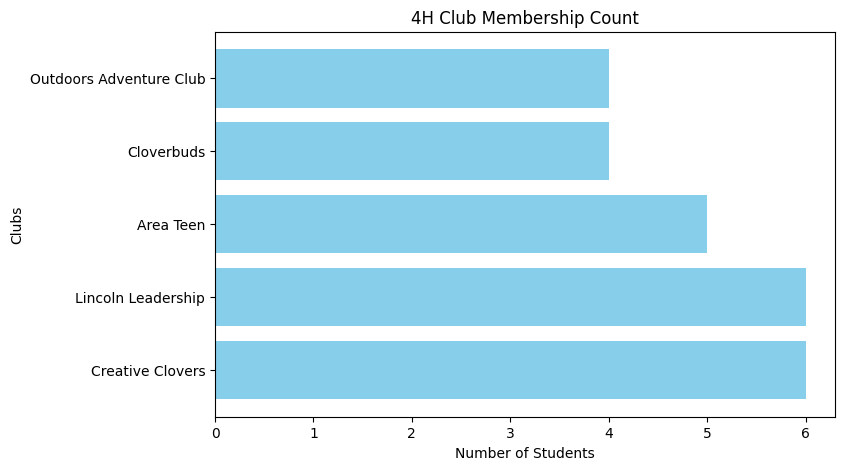

In [10]:
#Creating a bar chart to show the number of students per club
plt.figure(figsize=(8, 5))
plt.barh(club_counts['Clubs'], club_counts['StudentID'], color='skyblue')
plt.xlabel('Number of Students')
plt.ylabel('Clubs')
plt.title('4H Club Membership Count')
plt.show()

#2. Which school type has the most 4h students?

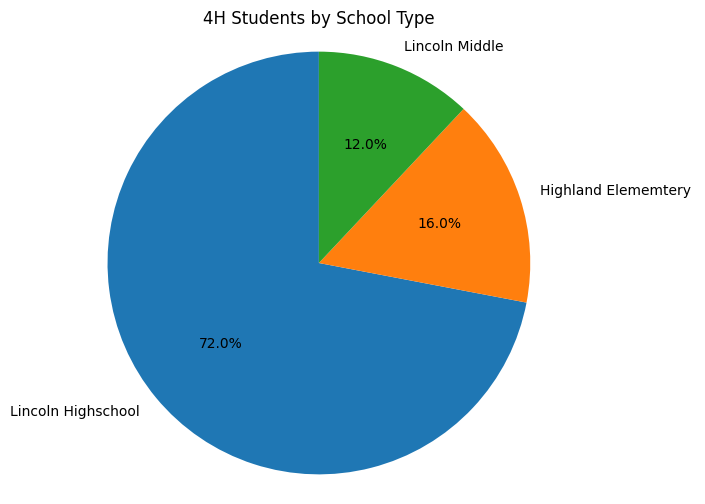

In [11]:
# Creating a pie chart to show the percentage of students in each school type
# Count the number of students in each school type
school_counts = df['School'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(school_counts, labels=school_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('4H Students by School Type')
plt.axis('equal') 
plt.show()

#3. Which 4H club has the most time spent each week on average?

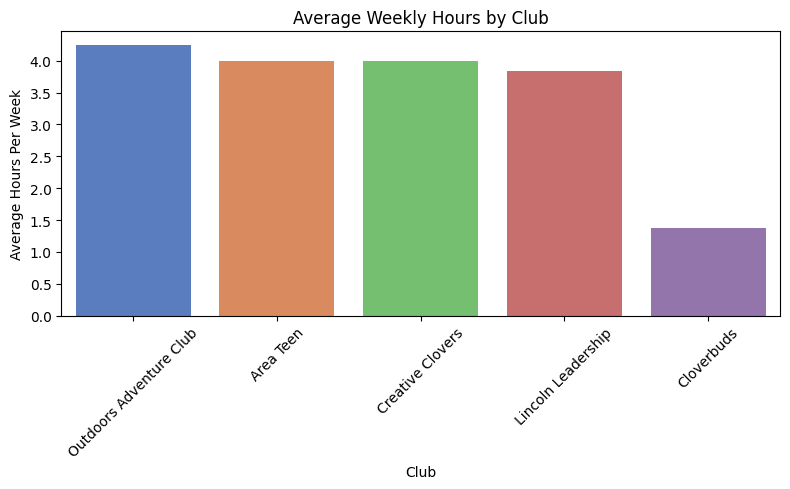

In [ ]:
# Create a bar chart to show the average hours per week by club
# Group by 'Clubs' and calculate the average hours per week

# Group and sort
avg_hours = df.groupby('Clubs')['Hours_Per_Week'].mean().reset_index()
avg_hours = avg_hours.sort_values(by='Hours_Per_Week', ascending=False)

# Seaborn barplot
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_hours, x='Clubs', y='Hours_Per_Week', hue='Clubs', palette='muted')

plt.xlabel('Club')
plt.ylabel('Average Hours Per Week')
plt.title('Average Weekly Hours by Club')
plt.xticks(rotation=45)
plt.show()


#4. What ages are the 4H students?

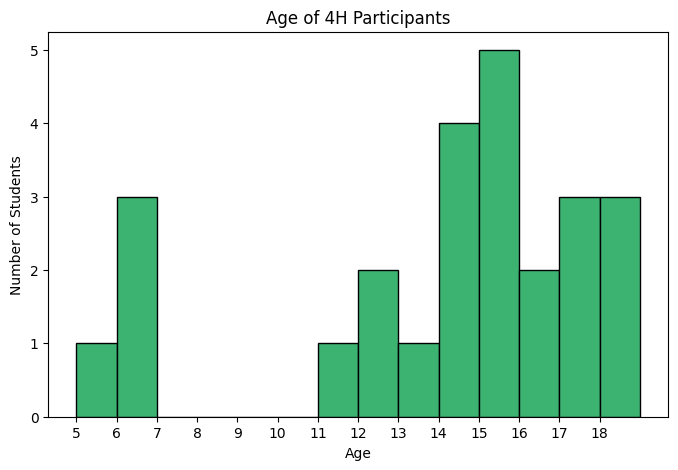

In [14]:
# Create a histogram to show the distribution of ages
plt.figure(figsize=(8, 5))
plt.hist(df['Age'], bins=range(df['Age'].min(), df['Age'].max() + 2), edgecolor='black', color='mediumseagreen')
plt.title('Age of 4H Participants')
plt.xlabel('Age')
plt.ylabel('Number of Students')
plt.xticks(range(df['Age'].min(), df['Age'].max() + 1))
plt.show()

#5. Which clubs have students with the most years in 4H?

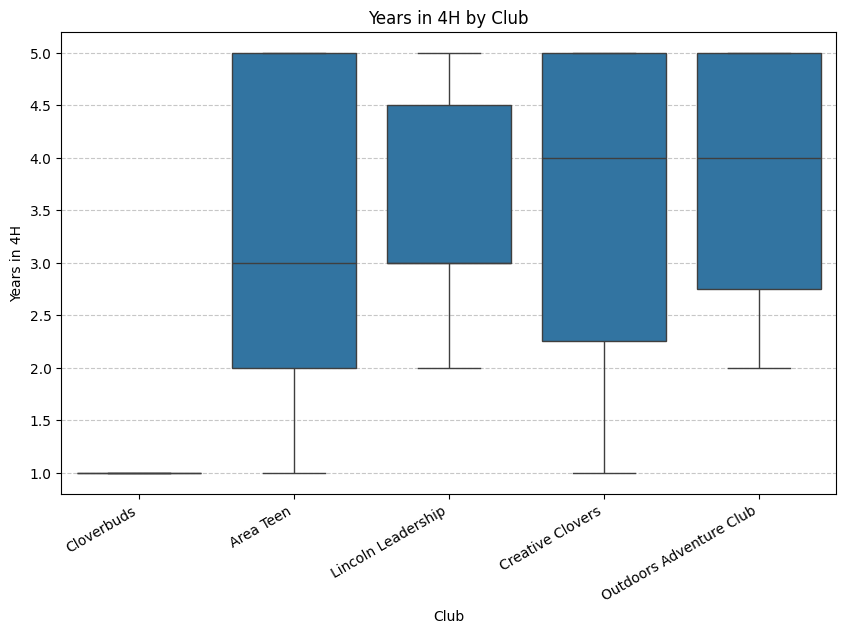

In [15]:
# Create a boxplot to show the distribution of hours per week by club
# This will help identify any outliers in the data

plt.figure(figsize=(10, 6))
order = df.groupby('Clubs')['years_in_4h'].median().sort_values().index
sns.boxplot(data=df, x='Clubs', y='years_in_4h', order=order)
plt.title('Years in 4H by Club')
plt.xlabel('Club')
plt.ylabel('Years in 4H')
plt.xticks(rotation=30, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

This chart shows how many years students have been in each 4H club. The line in the middle is the average, the box shows where most students fall, and the lines (whiskers) show the full range. It helps to see which clubs have mostly new students (cloverbuds), and which have a mix of new and experienced members.

#6. Do older students usually have more 4H experience?

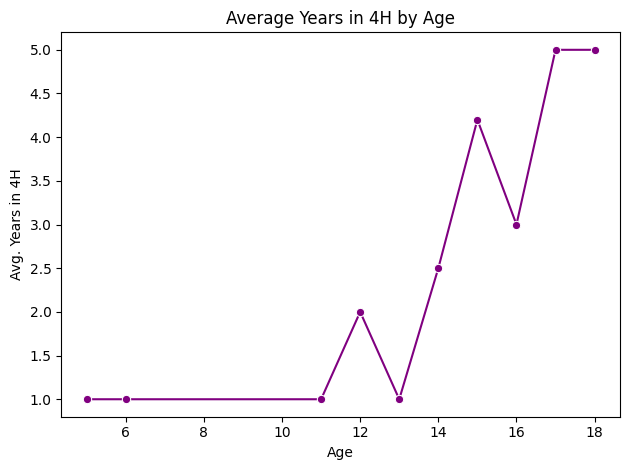

In [ ]:
# Create a line plot to show the average years in 4H by age
years_by_age = df.groupby('Age')['years_in_4h'].mean().reset_index()
sns.lineplot(data=years_by_age, x='Age', y='years_in_4h', marker='o', color='purple')
plt.title('Average Years in 4H by Age')
plt.xlabel('Age')
plt.ylabel('Avg. Years in 4H')
plt.tight_layout()
plt.show()

This chart helps us spot whether experience grows steadily with age or if some age groups join late or leave early.